<a href="https://colab.research.google.com/github/sax0man/EDA-on-Fake-News-Dataset/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                 # Data analysis and manipulation
import numpy as np                  # Perform mathematical operations on data
import matplotlib.pyplot as plt     # Displaying the interactive visualizaton
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import pickle
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer   # Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import TfidfTransformer  # Term Frequency (TF) Inverse Document Frequency (IDF). It is a text vectorizer that transforms the text into a usable vector.
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score                 # Metric to measure the models perfomance
from sklearn.model_selection import train_test_split       # Split the dataset into trainign and testing
from sklearn.pipeline import Pipeline # Makes the process of inputting data into a machine learning model to be fully automated

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/True.csv")

In [ ]:
# Add flag/class/label to track fake and real
fake["class"] = 0
true["class"] = 1

In [ ]:
fake.shape

(23481, 5)

In [ ]:
true.shape

(21417, 5)

Data Clean

In [ ]:
# Concatenate dataframes
merge = pd.concat([fake, true], axis =0)
merge.head(10)
merge.shape

(44898, 5)

In [ ]:
merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(merge)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,class
0,U.S. lawmakers ask Wells about taking back bon...,WASHINGTON (Reuters) - Five Democratic U.S. Se...,politicsNews,"September 16, 2016",1
1,U.S. bombers drill over Korean peninsula after...,SEOUL/TOKYO (Reuters) - South Korean and Japan...,worldnews,"August 29, 2017",1
2,Exclusive: Congressional committee questions o...,"LONDON, (Reuters) - Two influential U.S. Congr...",politicsNews,"November 1, 2017",1
3,Alabama Republican Governor BUSTED Lying To C...,They say the cover-up is always worse than the...,News,"August 12, 2016",0
4,Phil Robertson Will Be Donald Trump’s ‘Spirit...,"After having backed Senator Ted Cruz, Duck Dyn...",News,"May 18, 2016",0


In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,class
0,U.S. lawmakers ask Wells about taking back bon...,WASHINGTON (Reuters) - Five Democratic U.S. Se...,politicsNews,1
1,U.S. bombers drill over Korean peninsula after...,SEOUL/TOKYO (Reuters) - South Korean and Japan...,worldnews,1
2,Exclusive: Congressional committee questions o...,"LONDON, (Reuters) - Two influential U.S. Congr...",politicsNews,1
3,Alabama Republican Governor BUSTED Lying To C...,They say the cover-up is always worse than the...,News,0
4,Phil Robertson Will Be Donald Trump’s ‘Spirit...,"After having backed Senator Ted Cruz, Duck Dyn...",News,0


In [ ]:
# Convert to lowercase

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,title,text,subject,class
0,U.S. lawmakers ask Wells about taking back bon...,WASHINGTON Reuters Five Democratic US Senator...,politicsNews,1
1,U.S. bombers drill over Korean peninsula after...,SEOULTOKYO Reuters South Korean and Japanese ...,worldnews,1
2,Exclusive: Congressional committee questions o...,LONDON Reuters Two influential US Congressmen...,politicsNews,1
3,Alabama Republican Governor BUSTED Lying To C...,They say the coverup is always worse than the ...,News,0
4,Phil Robertson Will Be Donald Trump’s ‘Spirit...,After having backed Senator Ted Cruz Duck Dyna...,News,0


In [ ]:
# Removing stopwords
import nltk    #Natural Language ToolKit
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,title,text,subject,class
0,U.S. lawmakers ask Wells about taking back bon...,WASHINGTON Reuters Five Democratic US Senators...,politicsNews,1
1,U.S. bombers drill over Korean peninsula after...,SEOULTOKYO Reuters South Korean Japanese jets ...,worldnews,1
2,Exclusive: Congressional committee questions o...,LONDON Reuters Two influential US Congressmen ...,politicsNews,1
3,Alabama Republican Governor BUSTED Lying To C...,They say coverup always worse act Alabama Gove...,News,0
4,Phil Robertson Will Be Donald Trump’s ‘Spirit...,After backed Senator Ted Cruz Duck Dynasty red...,News,0


Basic Data EXploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


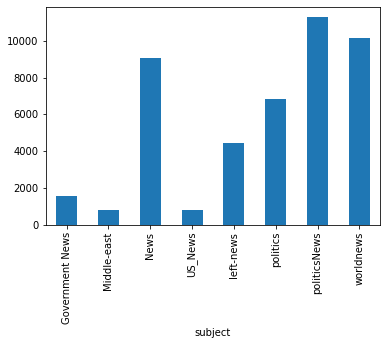

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

class
0    23481
1    21417
Name: text, dtype: int64


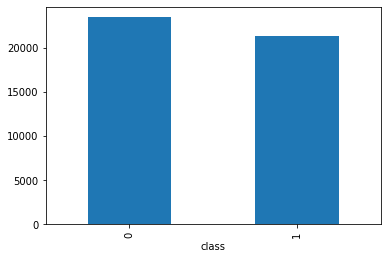

In [ ]:
# How many fake and real articles?
print(data.groupby(['class'])['text'].count())
data.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

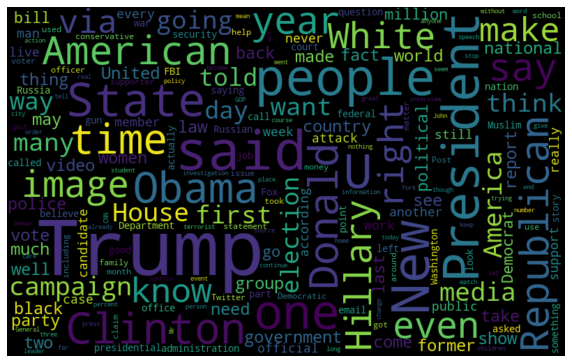

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

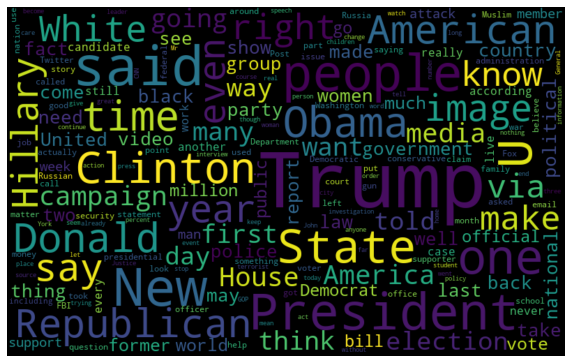

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["class"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter
# Feature extraction using TF-IDF

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

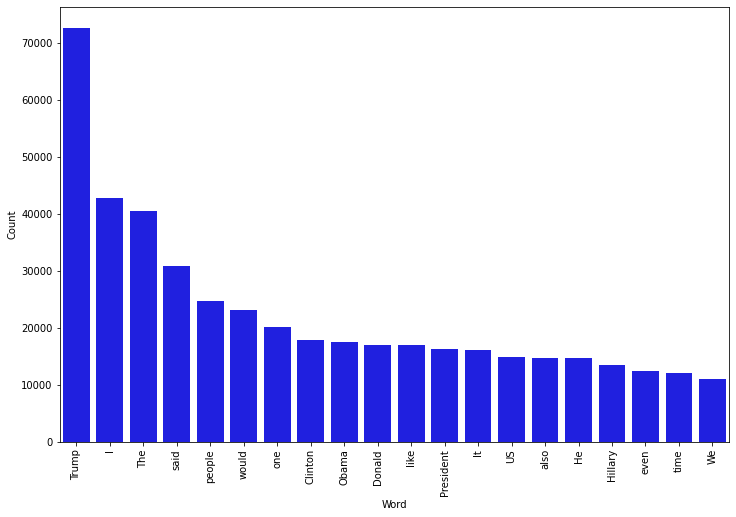

In [ ]:
# Most frequent words in fake news
counter(data[data["class"] == 0], "text", 20)

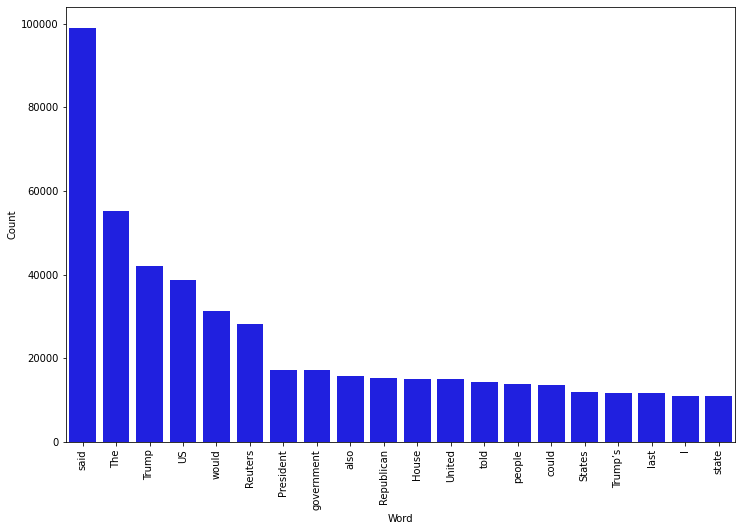

In [ ]:
# Most frequent words in real news
counter(data[data["class"] == 1], "text", 20)

Model

In [ ]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
x = data["text"]
y = data["class"]

Splitting the dataset into training set and testing set

In [ ]:
# Split the data - 20% test data and 80% train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,y_train)
pred_lr=lr.predict(xv_test)
lr.score(xv_test, y_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_lr)*100,2)))

accuracy: 98.76%


Confusion matrix, without normalization


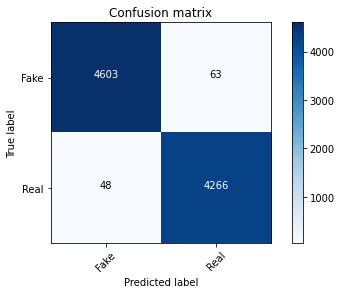

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4666
           1       0.99      0.99      0.99      4314

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

